# Titanic Project

#### This Notebook is written in Python and predicts the survival rate of passengers on the Titanic using the Titanic dataset.

### Importing Libraries and Dataset 

In [1]:
# Importing libraries

import numpy as np # for scientific computing
import pandas as pd # for data manipulation, analysis and cleaning
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for data visualization
from matplotlib import style # for data visualization
style.use('dark_background')
sns.set_style('whitegrid')

# Libraries for modelling
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

print("Done importing libraries...")

Done importing libraries...


In [2]:
# Loading Dataset

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

combine_df= [train_df,test_df]

print("Done loading dataset...")

Done loading dataset...


### Data Exploration and Visualization

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
# Size of datasets

train_shape = train_df.shape
test_shape  = test_df.shape

print('Train_df size: {}, Test_df size: {}'.format(train_shape,test_shape))

Train_df size: (891, 12), Test_df size: (418, 11)


#### Train_df has 891 rows, 12 columns while Test_df has 418 rows, 11 columns

In [7]:
# General info on datasets

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


#### From the above, it can be seen that there are missing values in both datasets

In [10]:
# Percentage of missing data

train_percent = train_df.isnull().sum() * 100 / len(train_df)
train_percent = train_percent.round(2).sort_values(ascending=False)
train_percent

Cabin          77.10
Age            19.87
Embarked        0.22
Fare            0.00
Ticket          0.00
Parch           0.00
SibSp           0.00
Sex             0.00
Name            0.00
Pclass          0.00
Survived        0.00
PassengerId     0.00
dtype: float64

In [11]:
test_percent = test_df.isnull().sum() * 100 / len(test_df)
test_percent = test_percent.round(2).sort_values(ascending=False)
test_percent

Cabin          78.23
Age            20.57
Fare            0.24
Embarked        0.00
Ticket          0.00
Parch           0.00
SibSp           0.00
Sex             0.00
Name            0.00
Pclass          0.00
PassengerId     0.00
dtype: float64

There are missing data in Cabin and Age column for both dataset. Also, there are missing data in
Embarked and Fare column for train and test dataset respectively.

A significant percent of over 70% of Cabin's data is missing in both dataset.

In [12]:
#Handling features not required for Modelling

train_df = train_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1)
test_df = test_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1)

print('Done removing columns(PassengerId, Name, Ticket and Cabin)')

Done removing columns(PassengerId, Name, Ticket and Cabin)


In [13]:
# New Size of datasets

train_shape= train_df.shape
test_shape= test_df.shape

print('Train_df size: {}, Test_df size: {}'.format(train_shape,test_shape))

Train_df size: (891, 8), Test_df size: (418, 7)


Train_df has 891 rows, 8 columns while Test_df has 418 rows, 7 columns

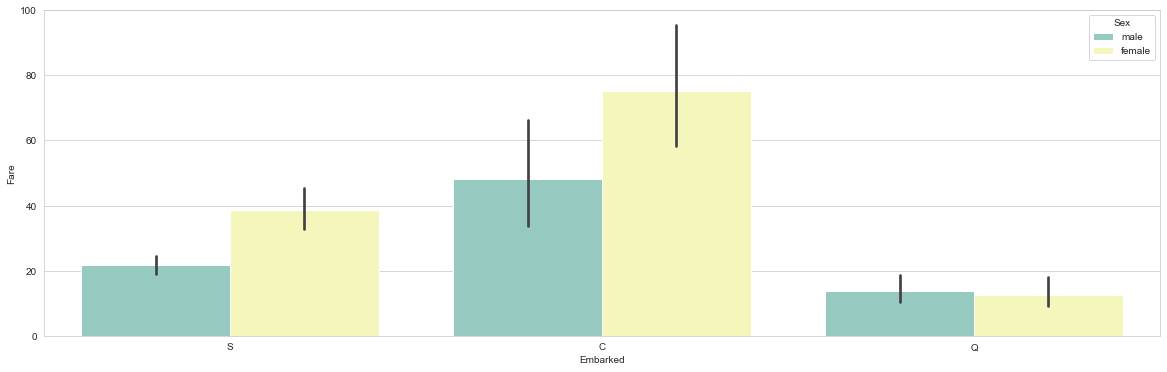

In [14]:
#Handling missing data

figure, axes = plt.subplots(1,1,figsize=(20, 6))
plot = sns.barplot(x="Embarked", y="Fare", hue="Sex", data=train_df, ax=axes)
plt.show()

In [19]:
from IPython.display import display

train_original= pd.read_csv('train.csv')

display(train_original[train_original['Embarked'].isnull()])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Both passengers are female who paid 80 dollars as fare for their tickets.
They have the same ticket and cabin, so they probably embarked from the same location.
From the distribution above, the more probable embarked value for them is Cherbourg (C).

In [25]:
def data_preprocessing(dataset):
# this function handles missing data for both train and test dataset

    clean_df = dataset
    
    clean_df['Embarked'].fillna('C', inplace = True) # replace missing embarked with C

    # replace missing ages by the mean age of passengers who belong to the same group of class/sex/family
    clean_df['Age'] = clean_df.groupby(['Pclass','Sex','Parch','SibSp'])['Age'].transform(lambda x: x.fillna(x.mean()))   
    clean_df['Age'] = clean_df.groupby(['Pclass','Sex','Parch'])['Age'].transform(lambda x: x.fillna(x.mean()))
    clean_df['Age'] = clean_df.groupby(['Pclass','Sex'])['Age'].transform(lambda x: x.fillna(x.mean()))
    
    
    clean_df['Fare'].fillna(clean_df['Fare'].median(), inplace = True) # replace missing fare value with fare median value
    
    return clean_df

In [26]:
cleaned_train_df = data_preprocessing(train_df)
cleaned_test_df = data_preprocessing(test_df)

In [27]:
cleaned_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [28]:
cleaned_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


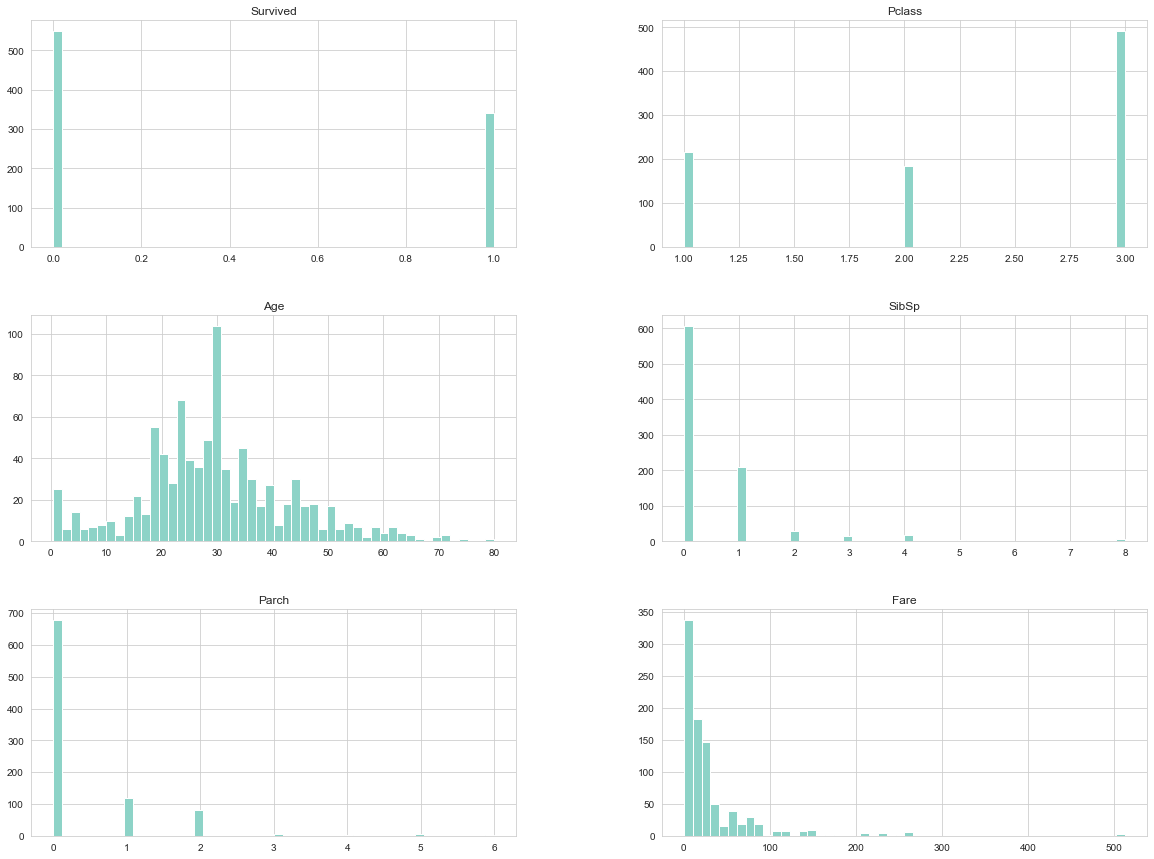

In [29]:
cleaned_train_df.hist(bins=50, figsize=(20,15))
plt.show()

<AxesSubplot:>

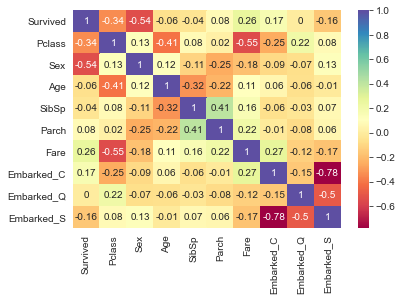

In [68]:
cleaned_train_df.corr()
sns.heatmap(round(cleaned_train_df.corr(),2), cmap='Spectral', annot=True)

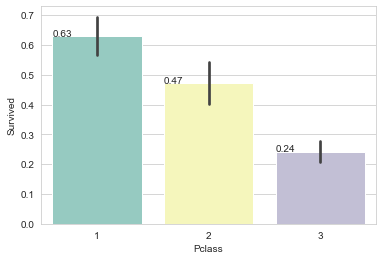

In [35]:
x= sns.barplot(x='Pclass', y='Survived', data=cleaned_train_df)
for p in x.patches:
    t = str(round(p.get_height(),2))
    t_x = p.get_x()
    t_y = p.get_height()
    x.text(t_x,t_y,t)

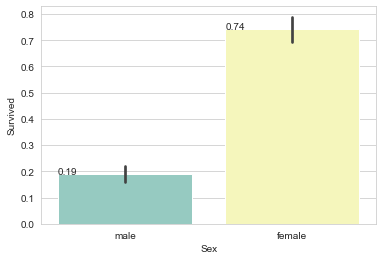

In [36]:
x = sns.barplot(x='Sex', y='Survived', data=cleaned_train_df)
for p in x.patches:
    t = str(round(p.get_height(),2))
    t_x = p.get_x()
    t_y = p.get_height()
    x.text(t_x,t_y,t)

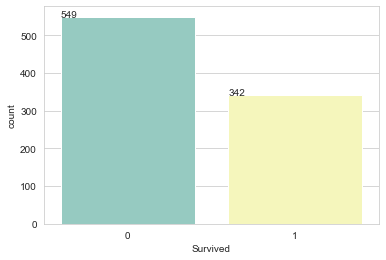

In [37]:
x = sns.countplot(x='Survived', data=cleaned_train_df)
for p in x.patches:
    t = str(round(p.get_height(),2))
    t_x = p.get_x()
    t_y = p.get_height()
    x.text(t_x,t_y,t)

In [38]:
print(pd.pivot_table(cleaned_train_df, index = 'Survived', columns = 'Pclass', values = 'Fare' ,aggfunc ='count'))
print()
print(pd.pivot_table(cleaned_train_df, index = 'Survived', columns = 'Sex', values = 'Fare' ,aggfunc ='count'))
print()
print(pd.pivot_table(cleaned_train_df, index = 'Survived', columns = 'Embarked', values = 'Fare' ,aggfunc ='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         95  30  217


In [39]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

print('Done importing..')

Done importing..


In [40]:
cleaned_train_df['Sex'] = le.fit_transform(cleaned_train_df['Sex'])
cleaned_train_df = pd.get_dummies(cleaned_train_df, columns = ['Embarked'])
cleaned_train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


In [41]:
cleaned_test_df['Sex'] = le.fit_transform(cleaned_test_df['Sex'])
cleaned_test_df = pd.get_dummies(cleaned_test_df, columns = ['Embarked'])
cleaned_test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,1,34.5,0,0,7.8292,0,1,0
1,3,0,47.0,1,0,7.0000,0,0,1
2,2,1,62.0,0,0,9.6875,0,1,0
3,3,1,27.0,0,0,8.6625,0,0,1
4,3,0,22.0,1,1,12.2875,0,0,1


### Data Modelling

In [42]:
x = cleaned_train_df.drop('Survived', axis = 1)
Y = cleaned_train_df.Survived

In [43]:
from sklearn.model_selection import train_test_split

x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size = 0.33, random_state = 0)

In [46]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [53]:
models = [LogisticRegression(),LinearSVC(),SVC(kernel='rbf'),KNeighborsClassifier(),RandomForestClassifier(),
        DecisionTreeClassifier(),GradientBoostingClassifier(),GaussianNB()]
model_names=['LogisticRegression','LinearSVM','rbfSVM','KNearestNeighbors','RandomForestClassifier','DecisionTree',
             'GradientBoostingClassifier','GaussianNB']

acc_list=[]
model_dic={}

for model in range(len(models)):
    clf=models[model]
    clf.fit(x_train,Y_train)
    predi=clf.predict(x_test)
    acc_list.append(accuracy_score(predi,Y_test))
     
model_dic={'Models':model_names,'Accuracy_Score':acc_list}
model_dic

{'Models': ['LogisticRegression',
  'LinearSVM',
  'rbfSVM',
  'KNearestNeighbors',
  'RandomForestClassifier',
  'DecisionTree',
  'GradientBoostingClassifier',
  'GaussianNB'],
 'Accuracy_Score': [0.7966101694915254,
  0.7796610169491526,
  0.7016949152542373,
  0.7186440677966102,
  0.8033898305084746,
  0.7898305084745763,
  0.823728813559322,
  0.7423728813559322]}

In [54]:
acc_frame=pd.DataFrame(model_dic)
acc_frame.sort_values(by = 'Accuracy_Score', ascending = False).round(3)

,Models,Accuracy_Score
6,GradientBoostingClassifier,0.824
4,RandomForestClassifier,0.803
0,LogisticRegression,0.797
5,DecisionTree,0.790
1,LinearSVM,0.780
7,GaussianNB,0.742
3,KNearestNeighbors,0.719
2,rbfSVM,0.702


<AxesSubplot:xlabel='Accuracy_Score', ylabel='Models'>

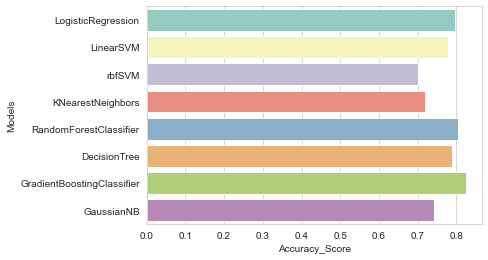

In [55]:
sns.barplot(y='Models',x='Accuracy_Score',data=acc_frame)

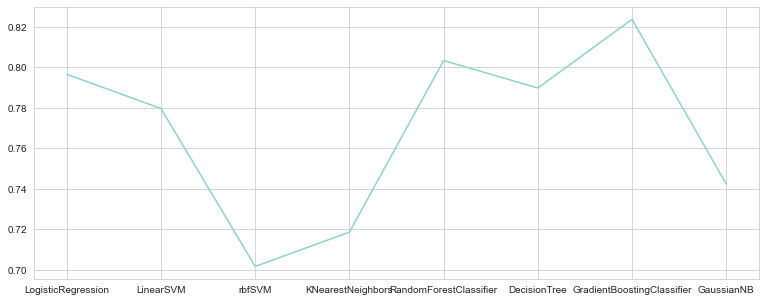

In [60]:
plt.figure(figsize=(13,5))
plt.plot(acc_frame.Models,acc_frame.Accuracy_Score)
plt.show()

From the above, it can be seen that GradientBoostingClassifier model has the highest accuracy score of 82.4%

### Prediction

In [62]:
gbc = GradientBoostingClassifier()
gbc.fit(x, Y)
test_predi = gbc.predict(cleaned_test_df)

In [63]:
#Saving prediction to csv

test_original = pd.read_csv('test.csv')

final_sub = pd.DataFrame({'Survived': test_predi,
                     'PassengerId':test_original.PassengerId})
final_sub.to_csv('sumbmission.csv', index = False)

print('Submission successfully saved...')

Submission successfully saved...


In [64]:
final_sub

,Survived,PassengerId
0,0,892
1,0,893
2,0,894
3,0,895
4,0,896
...,...,...
413,0,1305
414,1,1306
415,0,1307
416,0,1308


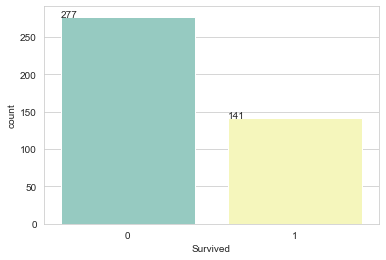

In [65]:
x = sns.countplot(x='Survived', data=final_sub)
for p in x.patches:
    t = str(p.get_height())
    t_x = p.get_x()
    t_y = p.get_height()
    x.text(t_x,t_y,t)

Modelling and Prediction was done using Sex, Age, PClass(Passengers Class), Fare, Embarked location, 
SibSp(No. of Siblings and Spouse), Parch(Parent and Children) to train the model and predict the 
survival rate of the passengers who boarded the Titanic.